In [1]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, StaleElementReferenceException
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time
import logging
from datetime import datetime

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

def scrape_seoul_commerce_data():
    # 웹드라이버 설정
    driver = webdriver.Chrome()
    driver.maximize_window()
    
    try:
        # 웹페이지 접속
        url = 'https://golmok.seoul.go.kr/stateArea.do'
        driver.get(url)
        
        # 명시적 대기 설정
        wait = WebDriverWait(driver, 10)
        
        # 첫 번째 버튼 클릭 (지역 선택)
        region_button = wait.until(
            EC.element_to_be_clickable((By.XPATH, '//*[@id="stateArea"]/div[1]/ul/li[8]/button'))
        )
        region_button.click()
        
        # 잠시 대기
        time.sleep(1)
        
        # 조회 버튼 클릭
        search_button = wait.until(
            EC.element_to_be_clickable((By.ID, 'presentSearch'))
        )
        search_button.click()
        
        # 데이터 로딩 대기
        time.sleep(2)
        
        # 테이블 데이터 찾기
        table = wait.until(
            EC.presence_of_element_located((By.CLASS_NAME, "tbl_col"))
        )
        
        # 테이블 데이터 추출
        rows = table.find_elements(By.TAG_NAME, "tr")
        data = []
        
        for row in rows:
            cols = row.find_elements(By.TAG_NAME, "td")
            if cols:
                row_data = [col.text for col in cols]
                data.append(row_data)
        
        # DataFrame으로 변환
        df = pd.DataFrame(data)
        
        # CSV 파일로 저장
        df.to_csv('seoul_commerce_data.csv', index=False, encoding='utf-8-sig')
        
        return "데이터 수집 완료!"
        
    except Exception as e:
        print(f"에러 발생: {str(e)}")
        
    finally:
        driver.quit()

# 함수 실행
scrape_seoul_commerce_data()

'데이터 수집 완료!'

In [4]:
# Assigning appropriate column names
columns = ['지역명',
           '2022년2분기_전체','2022년2분기_1층','2022년2분기_1층_외',
           '2023년2분기_전체', '2023년2분기_1층','2023년2분기_1층_외', 
           '2024년2분기_전체', '2024년2분기_1층', '2024년2분기_1층_외']

# Reading the CSV file with the defined column names
seoul_file_path = './seoul_commerce_data.csv'
df_seoul = pd.read_csv(seoul_file_path, encoding='utf-8-sig', header=1, names=columns)

# Dropping rows with NaN in '지역명' column
df_seoul_cleaned = df_seoul.dropna(subset=['지역명'])

# Display the cleaned data
df_seoul_cleaned

,지역명,2022년2분기_전체,2022년2분기_1층,2022년2분기_1층_외,2023년2분기_전체,2023년2분기_1층,2023년2분기_1층_외,2024년2분기_전체,2024년2분기_1층,2024년2분기_1층_외
0,종로구,"198,534","226,443","170,624","197,186","229,859","164,512","195,617","230,674","160,559"
18,중구,"240,311","253,968","226,655","292,292","307,381","277,204","269,374","282,431","256,317"
34,용산구,"137,701","150,920","124,483","142,058","167,407","116,709","125,065","140,285","109,845"
51,성동구,"134,990","154,451","115,530","225,218","234,169","216,267","136,247","146,129","126,364"
69,광진구,"112,800","134,024","91,576","106,205","123,408","89,002","106,244","127,395","85,092"
85,동대문구,"92,915","114,828","71,002","94,172","119,163","69,180","91,638","115,398","67,878"
100,중랑구,"87,580","106,838","68,321","82,183","104,666","59,700","89,195","105,403","72,986"
117,성북구,"106,288","123,046","89,530","99,996","121,200","78,792","111,710","126,437","96,983"
138,강북구,"93,343","111,844","74,842","84,816","101,756","67,876","90,963","107,986","73,940"
152,도봉구,"90,393","111,230","69,555","124,755","146,034","103,477","105,693","121,776","89,610"


In [13]:
# Assigning appropriate column names
new_columns = ['지역명', '2024년2분기_전체']

# Selecting only the relevant columns
df_seoul_cleaned2 = df_seoul_cleaned[['지역명', '2024년2분기_전체']]

# Renaming the columns
df_seoul_cleaned2.columns = new_columns


df_seoul_cleaned2.to_csv('seoul_commerce_data(임대시세).csv', index=False, encoding='utf-8-sig')

# Display the cleaned and renamed data
df_seoul_cleaned2

,지역명,2024년2분기_전체
0,종로구,"195,617"
18,중구,"269,374"
34,용산구,"125,065"
51,성동구,"136,247"
69,광진구,"106,244"
85,동대문구,"91,638"
100,중랑구,"89,195"
117,성북구,"111,710"
138,강북구,"90,963"
152,도봉구,"105,693"


object


/var/folders/p9/wrgtsqvn379gchbrkdqlbrwc0000gn/T/ipykernel_2370/2888919316.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul_cleaned2['2024년2분기_전체'] = df_seoul_cleaned2['2024년2분기_전체'].str.replace(',', '').astype(int)


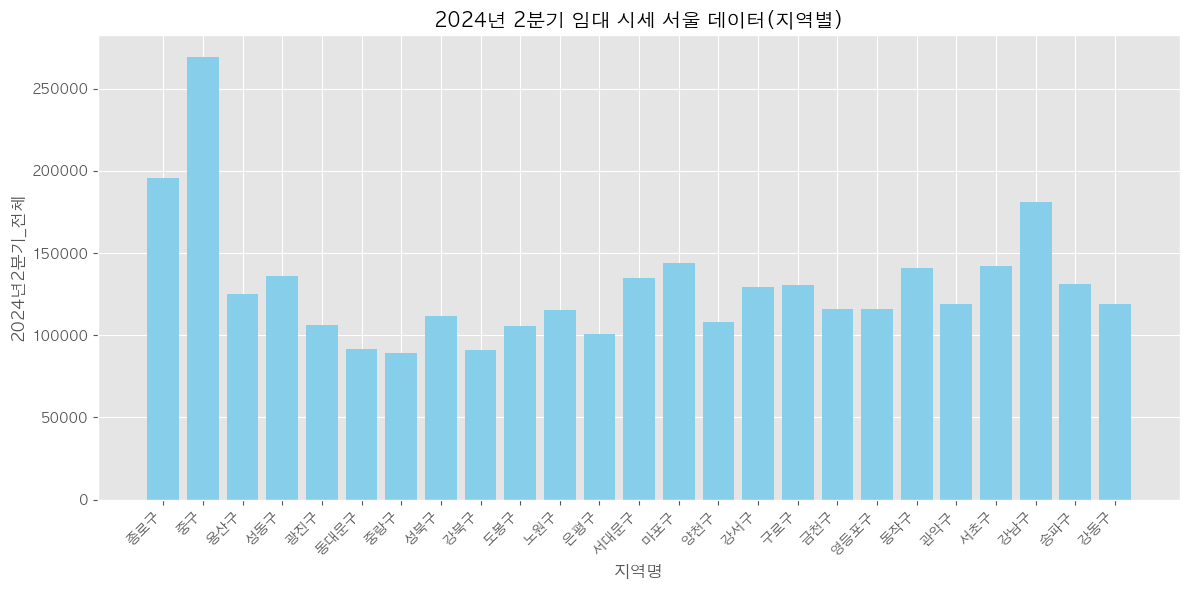

In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # MacOS 폰트 경로
font = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# 스타일 및 크기 설정
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (15, 10)
# 열의 데이터 타입 확인
print(df_seoul_cleaned2['2024년2분기_전체'].dtype)

# 데이터 타입이 숫자형이면 문자열 변환 없이 바로 사용 가능
if df_seoul_cleaned2['2024년2분기_전체'].dtype == 'object':
    df_seoul_cleaned2['2024년2분기_전체'] = df_seoul_cleaned2['2024년2분기_전체'].str.replace(',', '').astype(int)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_seoul_cleaned2['지역명'], df_seoul_cleaned2['2024년2분기_전체'], color='skyblue')
plt.xlabel('지역명', fontsize=12)
plt.ylabel('2024년2분기_전체', fontsize=12)
plt.title('2024년 2분기 임대 시세 서울 데이터(지역별)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
def scrape_seoul_income_data():
    # 웹드라이버 설정
    driver = webdriver.Chrome()
    driver.maximize_window()
    
    try:
        # 웹페이지 접속
        url = 'https://golmok.seoul.go.kr/stateArea.do'
        driver.get(url)
        
        # 명시적 대기 설정
        wait = WebDriverWait(driver, 10)
        
        # 첫 번째 버튼 클릭 (지역 선택)
        region_button = wait.until(
            EC.element_to_be_clickable((By.XPATH, '//*[@id="stateArea"]/div[1]/ul/li[7]/button'))
        )
        region_button.click()
        
        # 잠시 대기
        time.sleep(1)
        
        # 조회 버튼 클릭
        search_button = wait.until(
            EC.element_to_be_clickable((By.ID, 'presentSearch'))
        )
        search_button.click()
        
        # 데이터 로딩 대기
        time.sleep(2)
        
        # 테이블 데이터 찾기
        table = wait.until(
            EC.presence_of_element_located((By.CLASS_NAME, "tbl_col"))
        )
        
        # 테이블 데이터 추출
        rows = table.find_elements(By.TAG_NAME, "tr")
        data = []
        
        for row in rows:
            cols = row.find_elements(By.TAG_NAME, "td")
            if cols:
                row_data = [col.text for col in cols]
                data.append(row_data)
        
        # DataFrame으로 변환
        df = pd.DataFrame(data)
        
        # CSV 파일로 저장
        df.to_csv('seoul_income_data.csv', index=False, encoding='utf-8-sig')
        
        return "데이터 수집 완료!"
        
    except Exception as e:
        print(f"에러 발생: {str(e)}")
        
    finally:
        driver.quit()

# 함수 실행
scrape_seoul_income_data()

'데이터 수집 완료!'

In [17]:
# Assigning appropriate column names
columns = ['지역명',
           '2022년2분기_소득분위','2022년2분기_가구수',
           '2023년2분기_소득분위','2023년2분기_가구수',
           '2024년2분기_소득분위','2024년2분기_가구수']

# Reading the CSV file with the defined column names
seoul_file_path = './seoul_income_data.csv'
df_seoul = pd.read_csv(seoul_file_path, encoding='utf-8-sig', header=1, names=columns)

# Dropping rows with NaN in '지역명' column
df_seoul_income_cleaned = df_seoul.dropna(subset=['지역명']).copy()

# Removing unnecessary text in '소득분위' columns
columns_to_clean = ['2022년2분기_소득분위', '2023년2분기_소득분위', '2024년2분기_소득분위']
for col in columns_to_clean:
    df_seoul_income_cleaned.loc[:, col] = df_seoul_income_cleaned[col].str.split('\n').str[0]

# 결과 확인
df_seoul_income_cleaned.head()

,지역명,2022년2분기_소득분위,2022년2분기_가구수,2023년2분기_소득분위,2023년2분기_가구수,2024년2분기_소득분위,2024년2분기_가구수
0,종로구,7분위,"74,935",7분위,"74,935",7분위,"71,657"
18,중구,7분위,"63,375",7분위,"63,375",7분위,"64,443"
34,용산구,8분위,"112,556",8분위,"112,556",8분위,"107,664"
51,성동구,7분위,"135,787",7분위,"135,787",7분위,"132,568"
69,광진구,7분위,"167,243",7분위,"167,243",7분위,"169,703"


In [24]:
# Assigning appropriate column names
income2024_columns = ['지역명', '2024년2분기_소득분위','2024년2분기_가구수']

# Selecting only the relevant columns
df_seoul_income_cleaned = df_seoul_income_cleaned[['지역명', '2024년2분기_소득분위','2024년2분기_가구수']]

# Renaming the columns
df_seoul_income_cleaned.columns = income2024_columns
df_seoul_income_cleaned = df_seoul_income_cleaned.reset_index(drop=True)
df_seoul_income_cleaned.to_csv('df_seoul_income_cleaned_소득분위_가구수.csv', index=False, encoding='utf-8-sig',mode='w')

# Display the cleaned and renamed data
df_seoul_income_cleaned.head()


,지역명,2024년2분기_소득분위,2024년2분기_가구수
0,종로구,7분위,"71,657"
1,중구,7분위,"64,443"
2,용산구,8분위,"107,664"
3,성동구,7분위,"132,568"
4,광진구,7분위,"169,703"


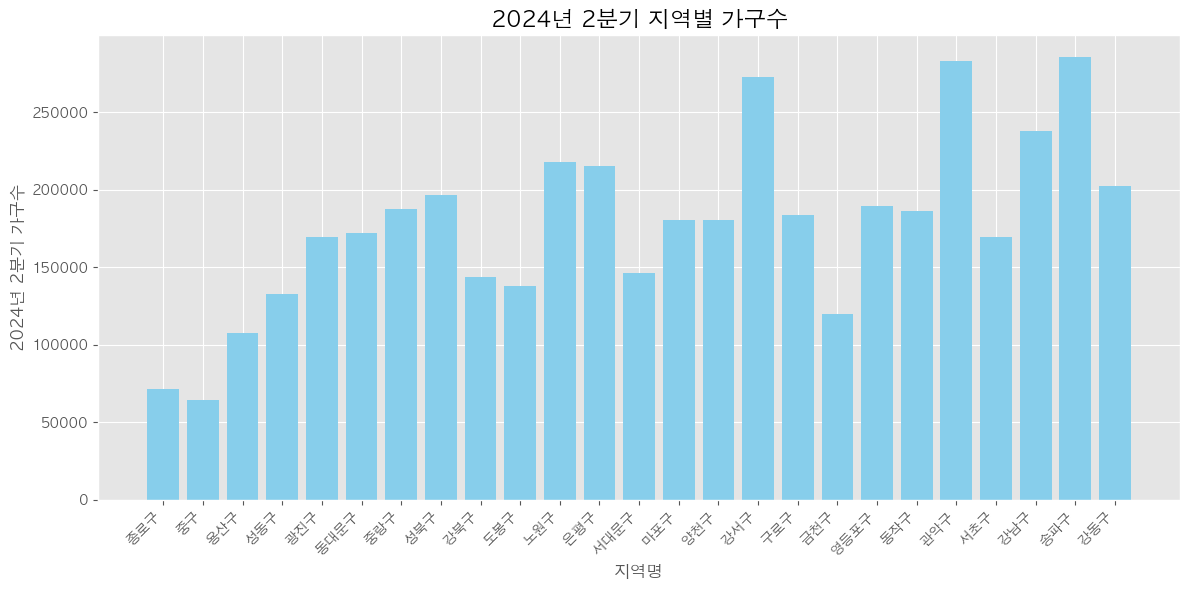

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 스타일 설정
plt.style.use('ggplot') 
plt.figure(figsize=(12, 6))

# 데이터 시각화
plt.bar(df_seoul_income_cleaned['지역명'], 
        df_seoul_income_cleaned['2024년2분기_가구수'].str.replace(',', '').astype(int), 
        color='skyblue')

# 그래프 꾸미기
plt.xlabel('지역명', fontsize=12)
plt.ylabel('2024년 2분기 가구수', fontsize=12)
plt.title('2024년 2분기 지역별 가구수', fontsize=16)
plt.xticks(rotation=45, ha='right')

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

In [41]:
bread_price_path = './anal_seoul/구별_빵_평균가격.csv'
bread_price_df = pd.read_csv(bread_price_path)

bread_price_df['지역명'] = bread_price_df['주소'].str.extract(r'서울특별시\s(.*구)')
bread_price_df.drop('주소', axis=1, inplace=True)

household_data_df = df_seoul_income_cleaned

# Step 2: Household data preprocessing
household_data_df['2024년2분기_가구수'] = household_data_df['2024년2분기_가구수']

# Merge bread price and household data
merged_df = pd.merge(household_data_df, bread_price_df, on='지역명', how='inner')
merged_df.rename(columns={
    '2024년2분기_가구수': '가구수',
    '평균가격': '빵_평균가격'
}, inplace=True)

merged_df

,지역명,2024년2분기_소득분위,가구수,빵_평균가격
0,종로구,7분위,71657,4838.212500
1,중구,7분위,64443,4874.656250
2,용산구,8분위,107664,4995.925000
3,성동구,7분위,132568,4737.000000
4,광진구,7분위,169703,4851.862500
5,동대문구,7분위,171946,4726.054167
6,중랑구,6분위,187708,4802.154167
7,성북구,7분위,196499,4746.501875
8,강북구,6분위,143436,4892.675000
9,도봉구,6분위,137870,4222.478571


In [42]:
household_bread_correlation = merged_df['가구수'].corr(merged_df['빵_평균가격'])

household_bread_correlation

-0.2136859514272642

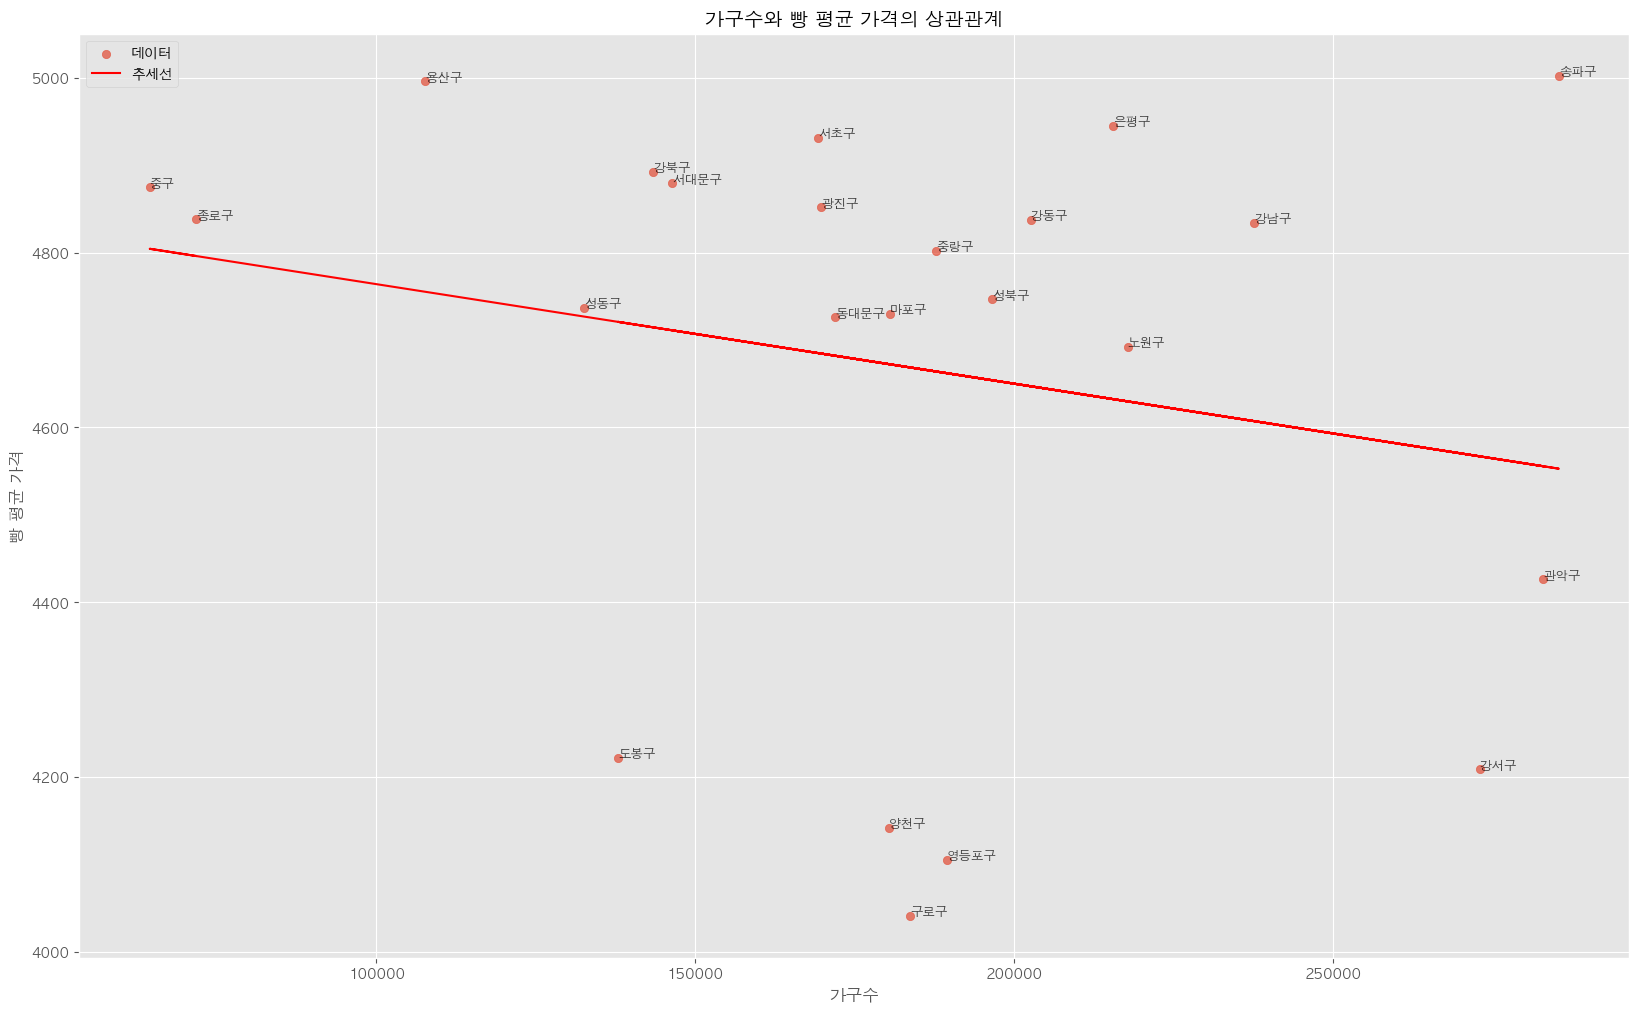

In [46]:
import numpy as np

# Scatter plot with trend line
plt.figure(figsize=(20, 12))

# Scatter plot
plt.scatter(merged_df['가구수'], merged_df['빵_평균가격'], alpha=0.7, label='데이터')

# Fit a linear regression line
z = np.polyfit(merged_df['가구수'], merged_df['빵_평균가격'], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(merged_df['가구수'], p(merged_df['가구수']), color='red', label='추세선')

for i, row in merged_df.iterrows():
    plt.annotate(row['지역명'], (row['가구수'], row['빵_평균가격']), fontsize=9, alpha=0.75)

# Add titles and labels
plt.title('가구수와 빵 평균 가격의 상관관계', fontsize=14)
plt.xlabel('가구수', fontsize=12)
plt.ylabel('빵 평균 가격', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

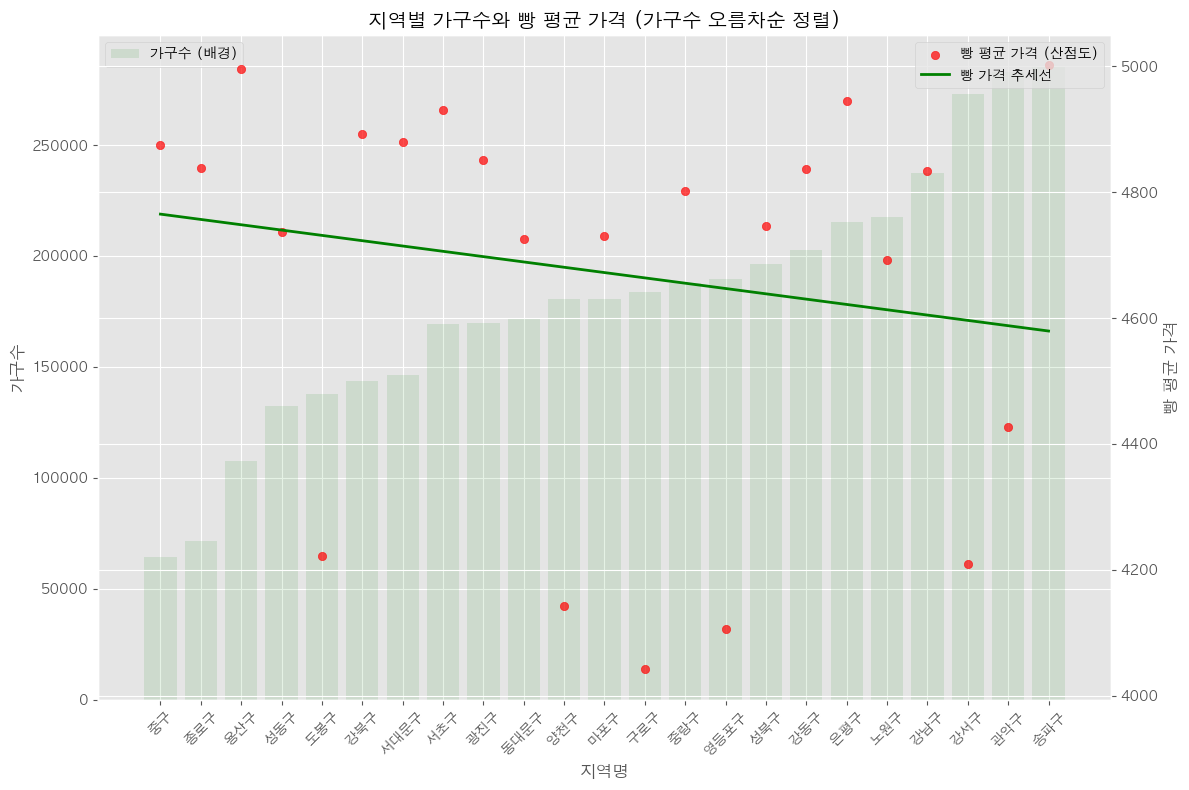

In [48]:
# Sort the data by '가구수' in ascending order
sorted_df = merged_df.sort_values(by='가구수')

# Create a combined scatter plot and bar chart with sorted data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for household numbers (background)
ax1.bar(
    sorted_df['지역명'], 
    sorted_df['가구수'], 
    alpha=0.1, 
    color='green', 
    label='가구수 (배경)'
)
ax1.set_ylabel('가구수', fontsize=12)
ax1.set_xlabel('지역명', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Second y-axis for bread prices
ax2 = ax1.twinx()
ax2.scatter(
    sorted_df['지역명'], 
    sorted_df['빵_평균가격'], 
    color='red', 
    label='빵 평균 가격 (산점도)', 
    alpha=0.7
)
ax2.set_ylabel('빵 평균 가격', fontsize=12)

# Fit a linear regression line for bread prices with sorted data
z = np.polyfit(range(len(sorted_df)), sorted_df['빵_평균가격'], 1)
p = np.poly1d(z)
ax2.plot(
    sorted_df['지역명'], 
    p(range(len(sorted_df))), 
    color='green', 
    label='빵 가격 추세선', 
    linewidth=2
)

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('지역별 가구수와 빵 평균 가격 (가구수 오름차순 정렬)', fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
apt_price_path = './anal_seoul/seoul_APT_PRICE.csv'

apt_price_df = pd.read_csv(apt_price_path)

apt_price_df = apt_price_df.iloc[1:, [0, 2, 4]]  # Use "금주" prices for both 매매 and 전세
apt_price_df.columns = ['지역명', '매매', '전세']

# Remove '서울특별시 ' prefix and commas, then convert prices to integers
apt_price_df['지역명'] = apt_price_df['지역명'].str.replace('서울특별시 ', '')
apt_price_df['매매'] = apt_price_df['매매'].str.replace(',', '').astype(int)
apt_price_df['전세'] = apt_price_df['전세'].str.replace(',', '').astype(int)

# Merge the apartment price data with the previously merged dataset
final_merged_with_apt = pd.merge(merged_df, apt_price_df, on='지역명', how='inner')

# Calculate the correlation between apartment prices (매매 and 전세) and bread prices
apt_sale_correlation = final_merged_with_apt['매매'].corr(final_merged_with_apt['빵_평균가격'])
apt_rent_correlation = final_merged_with_apt['전세'].corr(final_merged_with_apt['빵_평균가격'])

apt_sale_correlation, apt_rent_correlation

(0.35286863597446005, 0.40868241707445263)

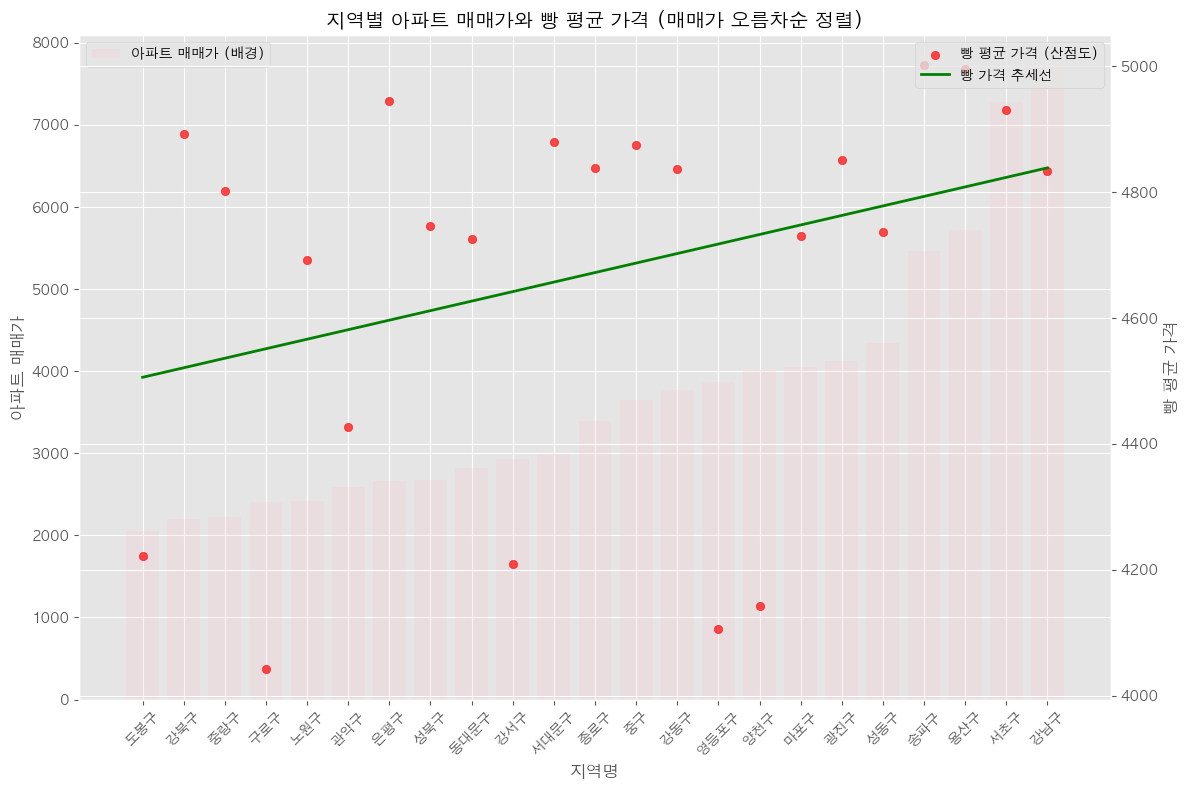

In [53]:
# Sort the merged data by '매매' for a better visual representation
sorted_apt_df = final_merged_with_apt.sort_values(by='매매')

# Create a combined scatter plot and bar chart for apartment prices and bread prices
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for apartment sale prices (background)
ax1.bar(
    sorted_apt_df['지역명'], 
    sorted_apt_df['매매'], 
    alpha=0.2, 
    color='pink', 
    label='아파트 매매가 (배경)'
)
ax1.set_ylabel('아파트 매매가', fontsize=12)
ax1.set_xlabel('지역명', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Second y-axis for bread prices
ax2 = ax1.twinx()
ax2.scatter(
    sorted_apt_df['지역명'], 
    sorted_apt_df['빵_평균가격'], 
    color='red', 
    label='빵 평균 가격 (산점도)', 
    alpha=0.7
)
ax2.set_ylabel('빵 평균 가격', fontsize=12)

# Fit a linear regression line for bread prices
z = np.polyfit(range(len(sorted_apt_df)), sorted_apt_df['빵_평균가격'], 1)
p = np.poly1d(z)
ax2.plot(
    sorted_apt_df['지역명'], 
    p(range(len(sorted_apt_df))), 
    color='green', 
    label='빵 가격 추세선', 
    linewidth=2
)

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('지역별 아파트 매매가와 빵 평균 가격 (매매가 오름차순 정렬)', fontsize=14)
plt.tight_layout()
plt.show()